In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLine2D


# py -m pip install matplotlib

In [2]:
data = pd.read_csv('df_private.txt', sep="\t")

In [3]:
k = data['Churn'].value_counts()
k

Churn
0    101427
1      6999
Name: count, dtype: int64

In [4]:
data['City'] = data['City'].str.replace(' ', '\n')

In [5]:
data['City'] = data['City'].replace('Other', 'Kita')

In [6]:
data['Duration'] = data['Duration'].replace('Long', 'Ilgalaikė')
data['Duration'] = data['Duration'].replace('Short', 'Trumpalaikė')

In [7]:
data['Make'] = data['Make'].replace('Other', 'Kita')

In [130]:
data = data[data['vehicle_type_group_mapped'] != 'Unknown']

In [8]:
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Personal', 'Asmeninis')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Motorcycle', 'Motociklas')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Tractor', 'Traktorius')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Trailer', 'Kemperis')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Delivery van', 'krovininis mikroautobusas')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Full trailer', 'Priekaba')
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace('Truck over 3,5T', 'Sunkvežimis')

In [9]:
k = data['Channel'].value_counts()
k

Channel
Broker                    89439
E-Sales                    9116
Own Network                7762
Call Center                1716
Direct Corporate Sales      391
Affinity                      2
Name: count, dtype: int64

In [10]:
data['Channel'] = data['Channel'].str.replace('Key Account', 'Svarbių klientų')
data['Channel'] = data['Channel'].str.replace('Call Center', 'Skambučių centras')
data['Channel'] = data['Channel'].str.replace('E-Sales', 'El. Prekyba')
data['Channel'] = data['Channel'].str.replace('Broker', 'Brokeriai')
data['Channel'] = data['Channel'].str.replace('Affinity', 'Partnerių ir alternatyvių pardavimų')
data['Channel'] = data['Channel'].str.replace('Own Network', 'Pardavimų tinklas')
data['Channel'] = data['Channel'].str.replace('Direct Corporate Sales', 'Tiesioginių verslo klientų')

In [11]:
data['vehicle_type_group_mapped'] = data['vehicle_type_group_mapped'].str.replace(' ', '\n')

In [12]:
data['Renewal'] = data['Renewal'].replace(0, 'Neatnaujinta')
data['Renewal'] = data['Renewal'].replace(1, 'Atnaujinta')

In [13]:
data['Gender'] = data['Gender'].str.replace('Male', 'Vyrai')
data['Gender'] = data['Gender'].str.replace('Female', 'Moterys')

In [14]:
g=data['Gender'].value_counts()
g

Gender
Vyrai      73234
Moterys    35192
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108426 entries, 0 to 108425
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCT                    108426 non-null  object 
 1   Duration                   108426 non-null  object 
 2   Vehicle_age                108426 non-null  float64
 3   Make                       108426 non-null  object 
 4   GWP                        108426 non-null  float64
 5   vehicle_type_group_mapped  108426 non-null  object 
 6   number_of_claims           108426 non-null  float64
 7   Channel                    108426 non-null  object 
 8   Churn                      108426 non-null  int64  
 9   Renewal                    108426 non-null  object 
 10  Policy_Duration            108426 non-null  int64  
 11  Gender                     108426 non-null  object 
 12  Client_Age                 108426 non-null  float64
 13  City                       10

Churn rates by city:
Vyrai: 3.90%
Moterys: 3.82%

Vyrai has the highest churn rate.


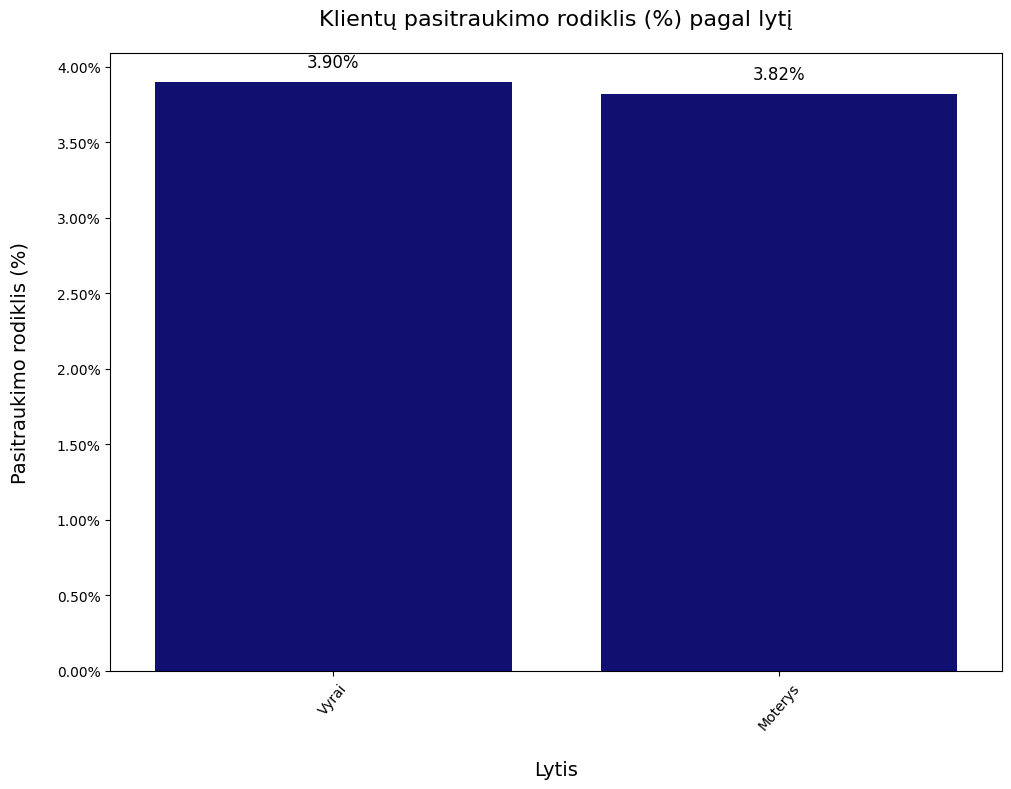

In [16]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['Gender'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Gender'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Gender'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal lytį', fontsize=16, pad=20)
plt.xlabel('Lytis', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Kita: 3.62%
Vilnius: 3.36%
Kaunas: 3.66%
Vilniaus
rajonas: 4.40%
Klaipėda: 3.70%
Kauno
rajonas: 3.82%
Klaipėdos
rajonas: 4.57%
Panevėžio
rajonas: 5.13%
Panevėžys: 4.46%
Šiauliai: 4.47%
Telšiai: 3.33%
Jonava: 6.78%
Alytus: 5.40%
Alytaus
rajonas: 6.03%
Mažeikiai: 3.15%
Šiaulių
rajonas: 3.48%
Marijampolė: 4.45%
Marijampolės
rajonas: 4.87%

Jonava has the highest churn rate.


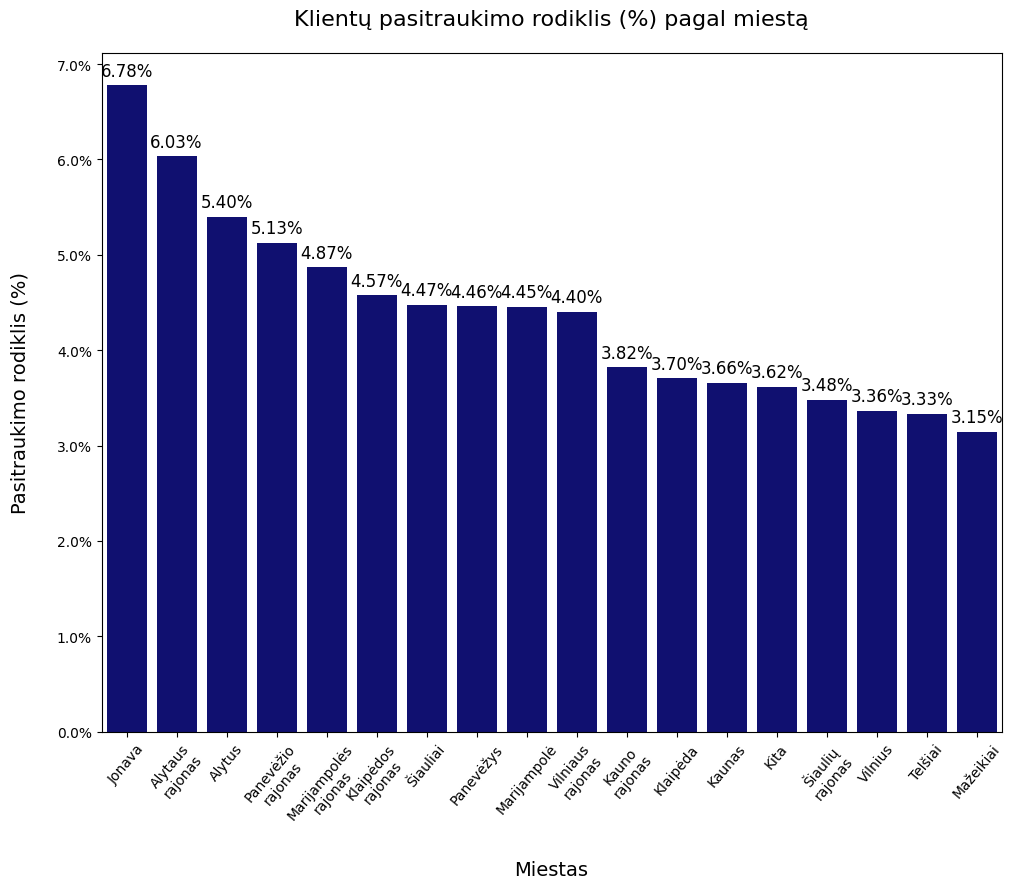

In [17]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['City'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['City'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['City'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 9))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal miestą', fontsize=16, pad=20)
plt.xlabel('Miestas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Asmeninis: 4.02%
krovininis
mikroautobusas: 3.61%
Kemperis: 1.23%
Motociklas: 1.29%
Priekaba: 3.53%
Traktorius: 4.39%
Sunkvežimis: 20.00%

Sunkvežimis has the highest churn rate.


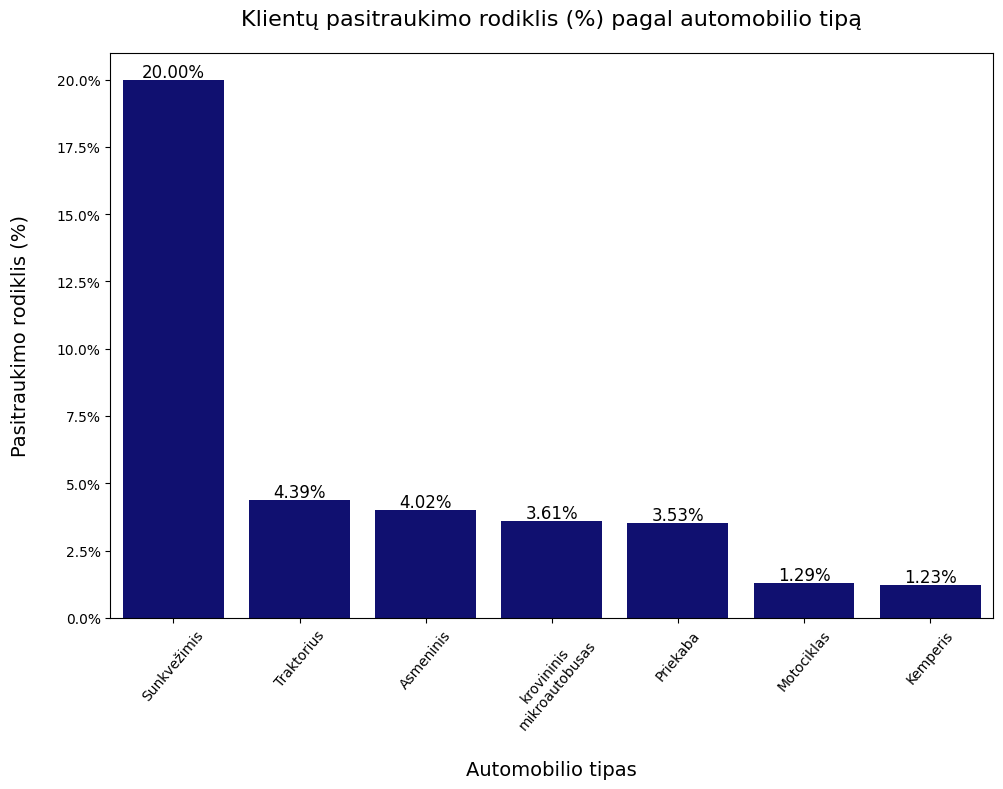

In [18]:
# CHURN RATE 

df = pd.DataFrame(data)

df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace(r'\d+\)', '', regex=True).str.strip()

# Filter out the "Unknown" category
df = df[df['vehicle_type_group_mapped'] != 'Unknown']

df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('Bus', 'Autobusas')

categories = df['vehicle_type_group_mapped'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['vehicle_type_group_mapped'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['vehicle_type_group_mapped'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal automobilio tipą', fontsize=16, pad=20)
plt.xlabel('Automobilio tipas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
0.0: 3.83%
1.0: 4.60%
2.0: 4.58%
4.0: 3.43%
3.0: 3.33%
6.0: 0.00%
5.0: 0.00%
7.0: 0.00%
9.0: 0.00%

1.0 has the highest churn rate.


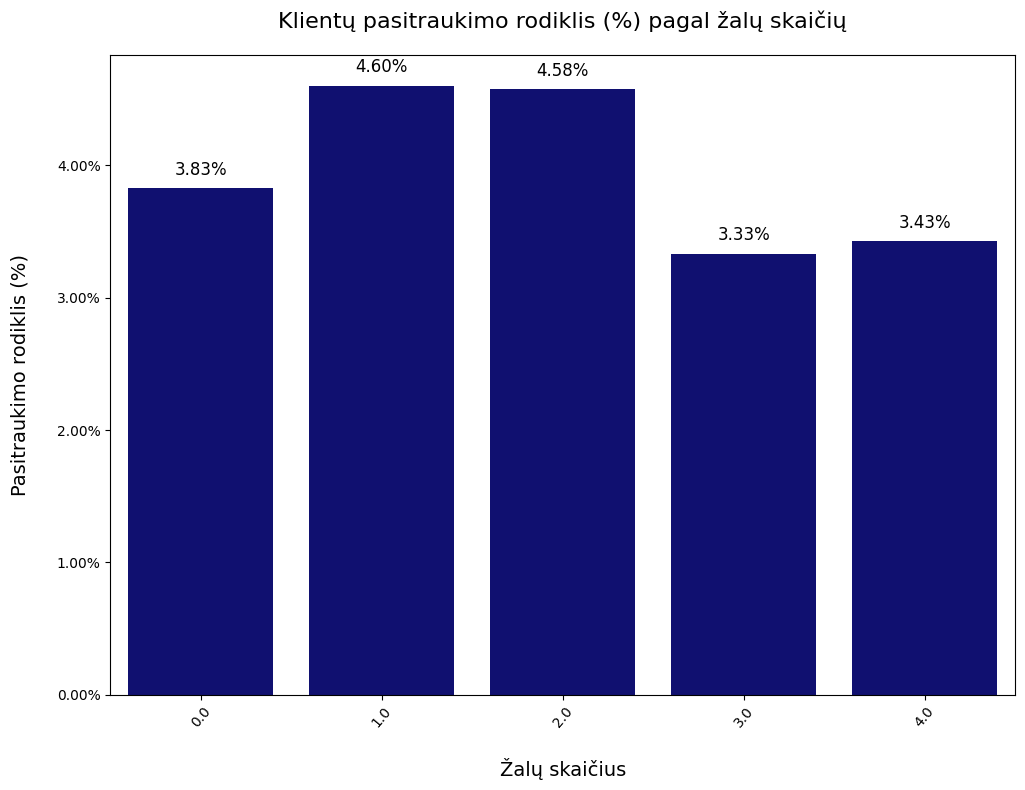

In [19]:
# CHURN RATE 

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['number_of_claims'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['number_of_claims'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['number_of_claims'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])
churn_rate_df = churn_rate_df[churn_rate_df['Churn Rate'] > 0]

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal žalų skaičių', fontsize=16, pad=20)
plt.xlabel('Žalų skaičius', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Ilgalaikė: 5.74%
Trumpalaikė: 1.82%

Ilgalaikė has the highest churn rate.


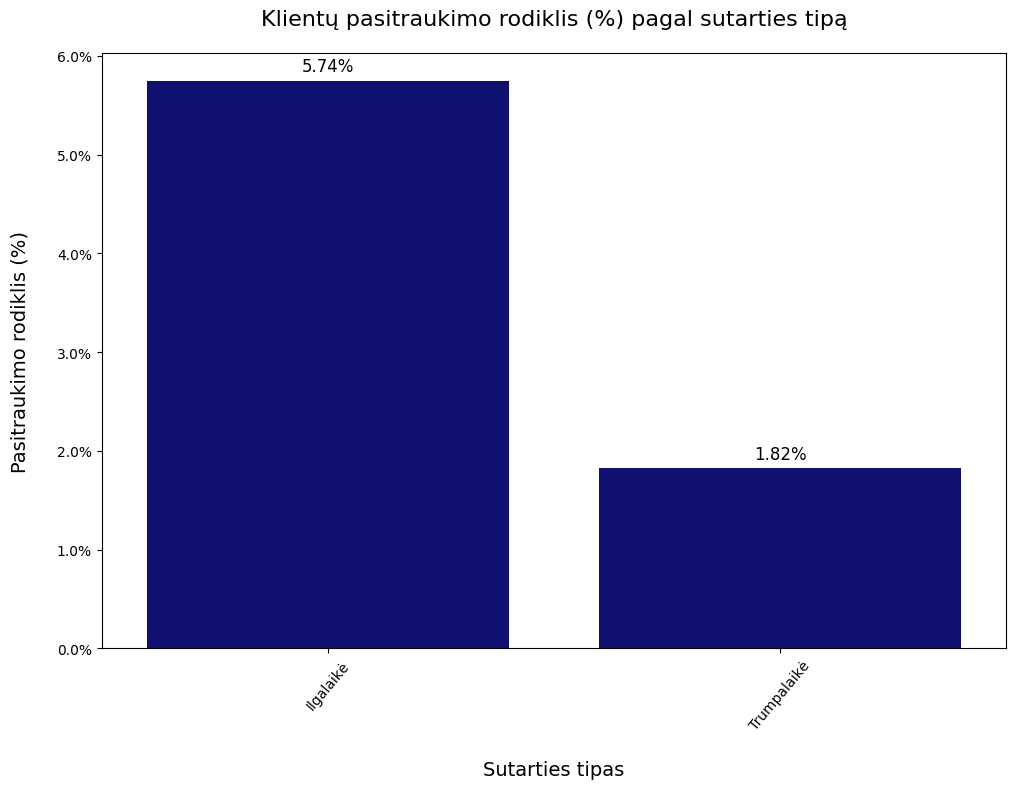

In [20]:
# CHURN RATE 

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['Duration'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Duration'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Duration'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal sutarties tipą', fontsize=16, pad=20)
plt.xlabel('Sutarties tipas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
Brokeriai: 3.57%
Pardavimų tinklas: 6.73%
El. Prekyba: 3.86%
Tiesioginių verslo klientų: 8.44%
Skambučių centras: 5.80%
Partnerių ir alternatyvių pardavimų: 0.00%

Tiesioginių verslo klientų has the highest churn rate.


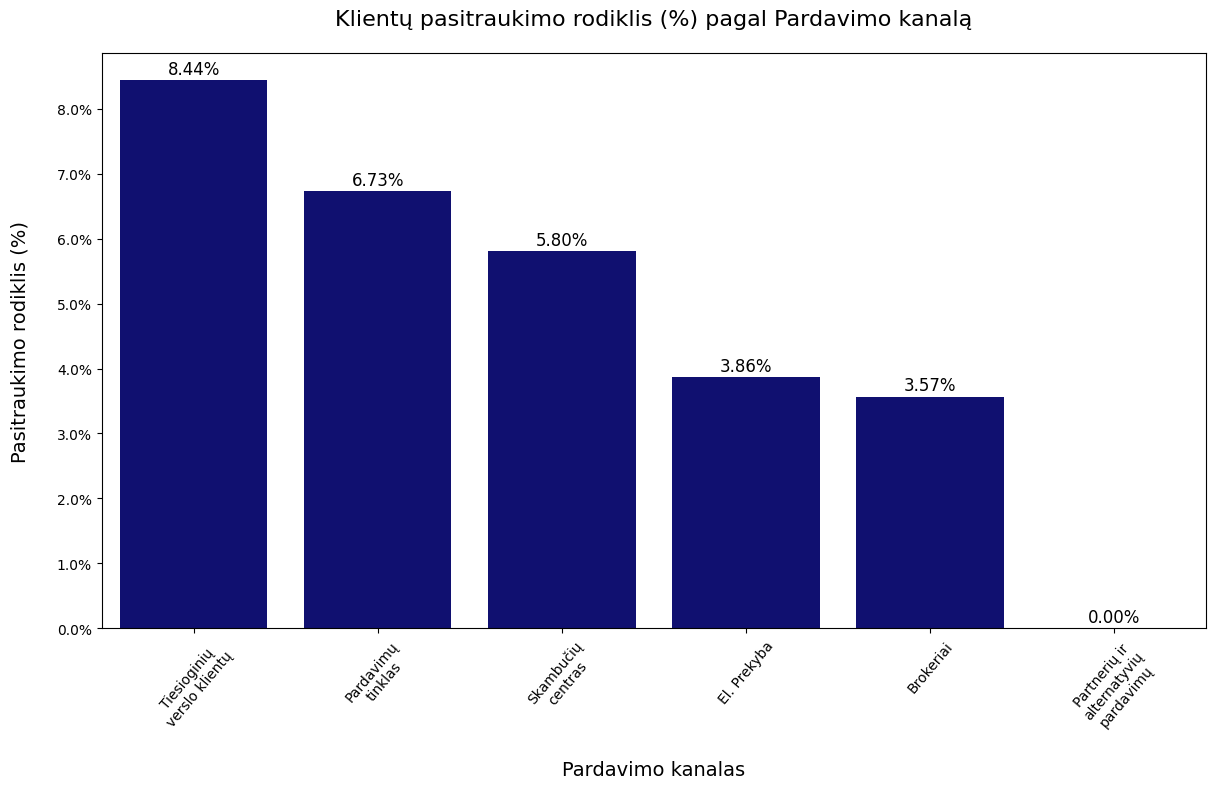

In [21]:
# CHURN RATE 
import textwrap

df = pd.DataFrame(data)


# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['Channel'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Channel'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Channel'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

def add_line_breaks(text, max_length=15):
    # Split the text at max_length characters
    return '\n'.join(textwrap.wrap(text, max_length))

# Apply the function to each category name
churn_rate_df['Category'] = churn_rate_df['Category'].apply(add_line_breaks)

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)




plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal Pardavimo kanalą', fontsize=16, pad=20)
plt.xlabel('Pardavimo kanalas', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Churn rates by city:
VW: 4.08%
KIA: 4.82%
FORD: 3.53%
SUBARU: 4.55%
TOYOTA: 4.14%
SKODA: 4.14%
MERCEDES BENZ: 4.26%
VOLVO: 4.04%
MITSUBISHI: 3.84%
AUDI: 4.01%
HONDA: 2.84%
DODGE: 3.03%
OPEL: 3.31%
JEEP: 4.35%
FIAT: 4.31%
HYUNDAI: 3.72%
BMW: 4.34%
MINI: 3.39%
CITROEN: 3.95%
NISSAN: 4.04%
RENAULT: 3.98%
PEUGEOT: 3.71%
SUZUKI: 1.80%
SAAB: 4.26%
MAZDA: 4.03%
SEAT: 4.14%
ALFA ROMEO: 2.73%
CHEVROLET: 3.03%
LANCIA: 3.30%
CHRYSLER: 5.15%
LAND ROVER: 4.32%
LEXUS: 5.10%
Kita: 2.32%
JAGUAR: 5.00%
YAMAHA: 1.26%
ROVER: 5.17%
KTM: 2.31%
DAIMLERCHRYSLER: 3.43%
KAWASAKI: 1.26%
APRILIA: 1.79%

ROVER has the highest churn rate.


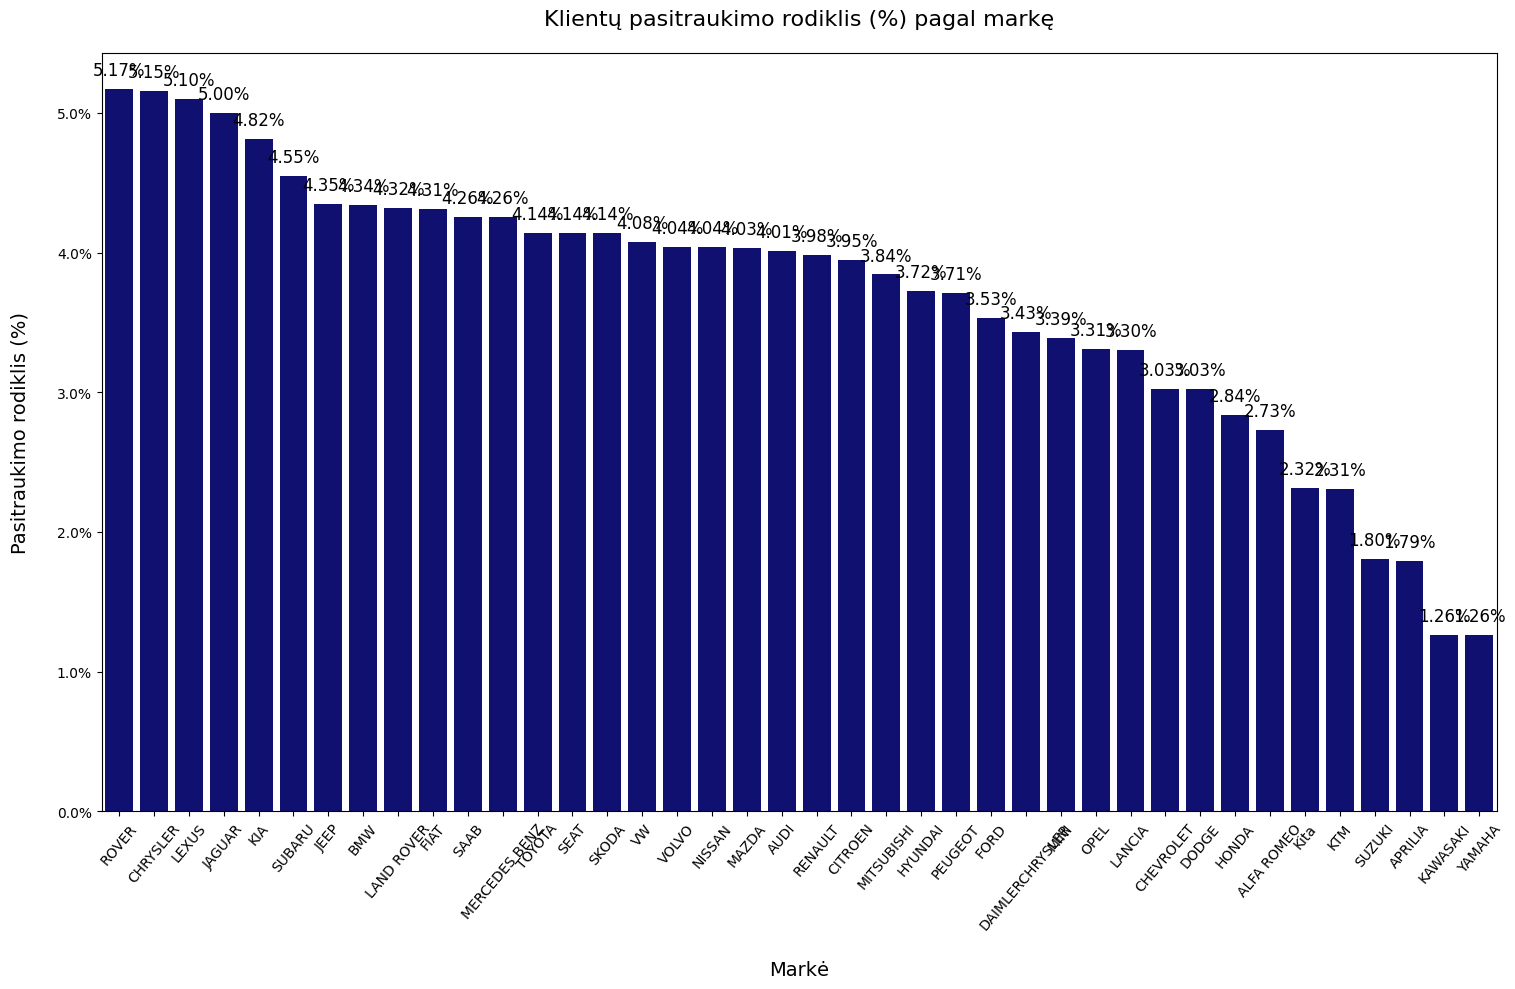

In [22]:
# CHURN RATE 

df = pd.DataFrame(data)

categories = df['Make'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Make'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Make'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal markę', fontsize=16, pad=20)
plt.xlabel('Markė', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


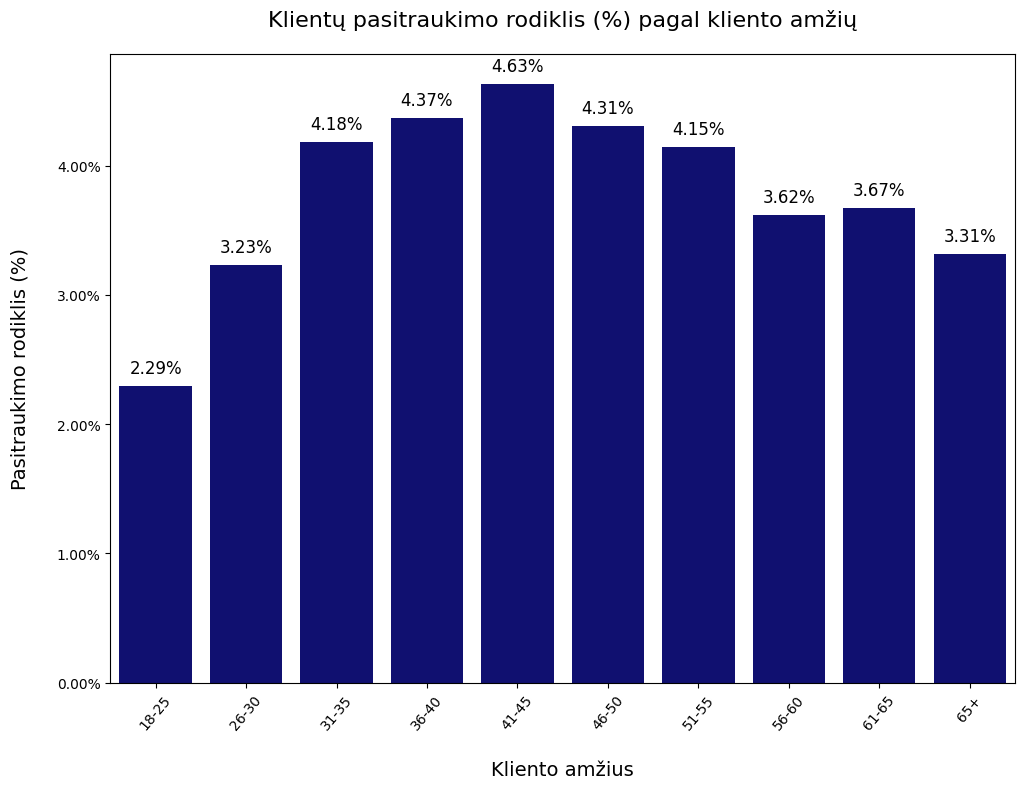

In [23]:
df = pd.DataFrame(data)

age_groups = [(18, 26), (26, 31), (31, 36), (36, 41), (41, 46), (46, 51), (51, 56), (56, 61), (61, 66)]

def categorize_age(age, age_groups):
    for lower, upper in age_groups:
        if lower <= age < upper:
            return f'{lower}-{upper - 1}'
    return '65+'

df['Age_Group'] = df['Client_Age'].apply(lambda age: categorize_age(age, age_groups))

churn_rate_by_age_group = df.groupby('Age_Group').agg({
    'Churn': 'sum',
    'Client_Age': 'count'
}).rename(columns={'Client_Age': 'Total_Clients'}).reset_index()

churn_rate_by_age_group['Churn Rate'] = (churn_rate_by_age_group['Churn'] / churn_rate_by_age_group['Total_Clients']) * 100 * 0.6

#sorted_churn_rate_by_age_group = churn_rate_by_age_group.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Age_Group', y='Churn Rate', data=churn_rate_by_age_group, color='navy')
plt.xticks(rotation=50)
plt.title('Klientų pasitraukimo rodiklis (%) pagal kliento amžių', fontsize=16, pad=20)
plt.xlabel('Kliento amžius', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_6160\2698755485.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({


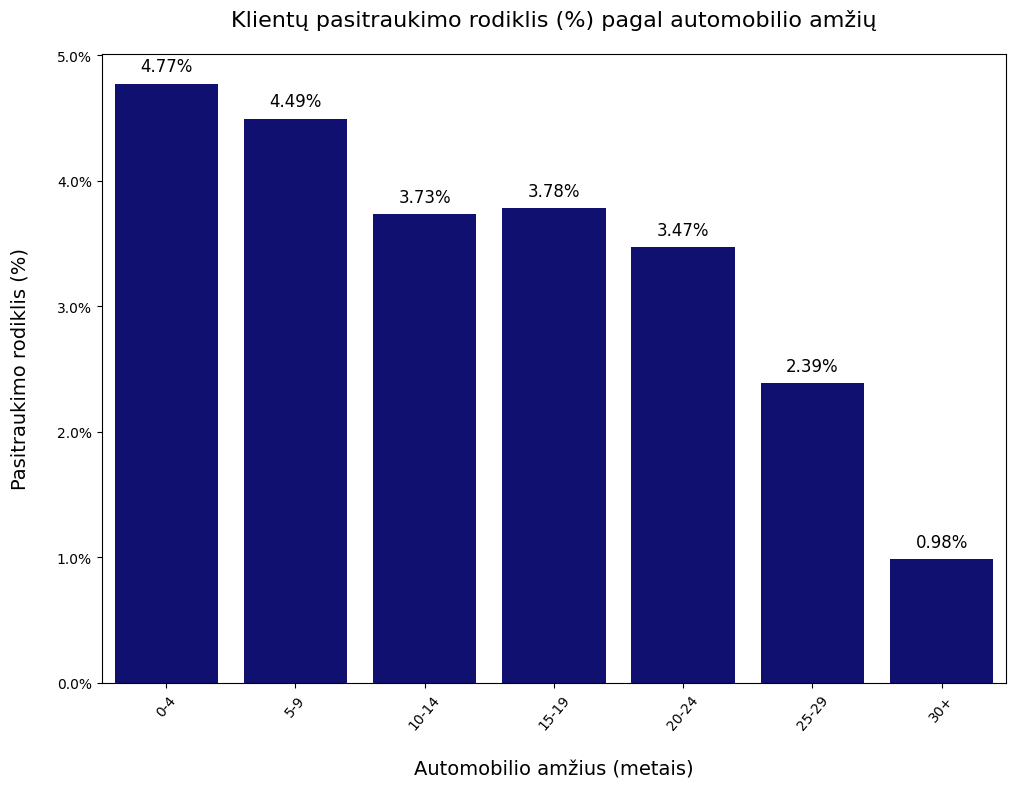

In [24]:
df = pd.DataFrame(data)

vehicle_age_groups = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]

def categorize_vehicle_age(vehicle_age, vehicle_age_groups):
    for lower, upper in vehicle_age_groups:
        if lower <= vehicle_age < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Vehicle_Age_Group'] = df['Vehicle_age'].apply(lambda age: categorize_vehicle_age(age, vehicle_age_groups))

# Define the order of categories as they should appear on the x-axis
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

# Convert 'Vehicle_Age_Group' to a categorical type with the defined order
df['Vehicle_Age_Group'] = pd.Categorical(df['Vehicle_Age_Group'], categories=category_order, ordered=True)

churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({
    'Churn': 'sum',
    'Vehicle_age': 'count'
}).rename(columns={'Vehicle_age': 'Total_Vehicles'}).reset_index()

# Calculate churn rate
churn_rate_by_vehicle_age_group['Churn Rate'] = (churn_rate_by_vehicle_age_group['Churn'] / churn_rate_by_vehicle_age_group['Total_Vehicles']) * 100 * 0.6

# Make sure to sort the DataFrame by the categorical column before plotting
churn_rate_by_vehicle_age_group = churn_rate_by_vehicle_age_group.sort_values('Vehicle_Age_Group')


plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Vehicle_Age_Group', y='Churn Rate', data=churn_rate_by_vehicle_age_group, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal automobilio amžių', fontsize=16, pad=20)
plt.xlabel('Automobilio amžius (metais)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_6160\3851206474.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({


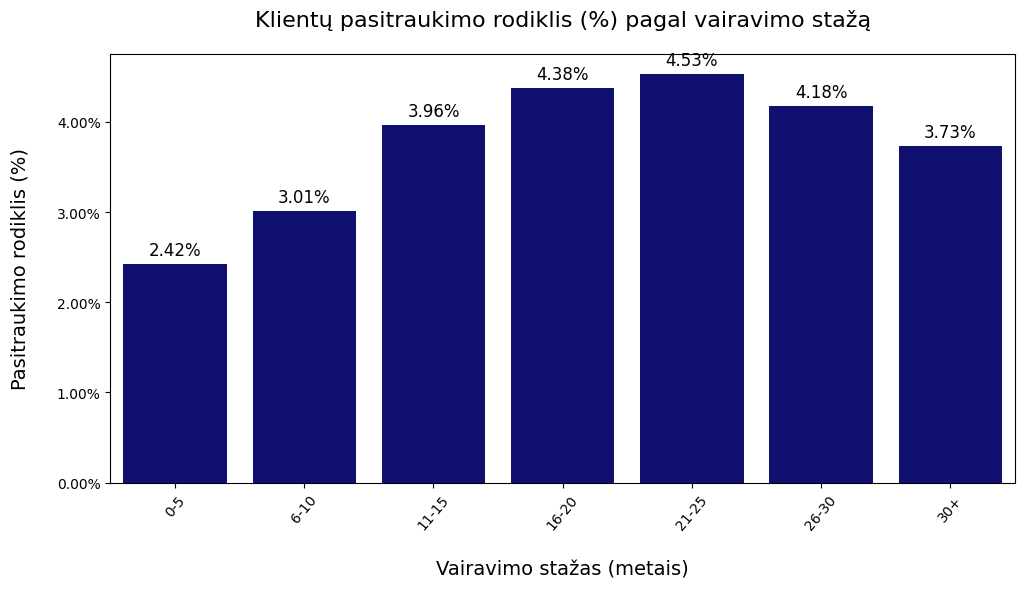

In [25]:
df = pd.DataFrame(data)

driving_experience_groups = [(0, 6), (6, 11), (11, 16), (16, 21), (21, 26), (26, 31)]

def categorize_driving_experience(years, driving_experience_groups):
    for lower, upper in driving_experience_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Driving_Experience_Group'] = df['Years_of_driving'].apply(lambda years: categorize_driving_experience(years, driving_experience_groups))

churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()


experience_order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']
df['Driving_Experience_Group'] = pd.Categorical(df['Driving_Experience_Group'], categories=experience_order, ordered=True)

# Sort the DataFrame by 'Driving_Experience_Group' using the ordered categorical
churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()

churn_rate_by_driving_experience_group['Churn Rate'] = (churn_rate_by_driving_experience_group['Churn'] / churn_rate_by_driving_experience_group['Total_Drivers']) * 100 * 0.6

churn_rate_by_driving_experience_group['Driving_Experience_Group'] = pd.Categorical(
    churn_rate_by_driving_experience_group['Driving_Experience_Group'],
    categories=experience_order,
    ordered=True
)

churn_rate_by_driving_experience_group = churn_rate_by_driving_experience_group.sort_values('Driving_Experience_Group')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Driving_Experience_Group', y='Churn Rate', data=churn_rate_by_driving_experience_group, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal vairavimo stažą', fontsize=16, pad=20)
plt.xlabel('Vairavimo stažas (metais)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_6160\4158071299.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({


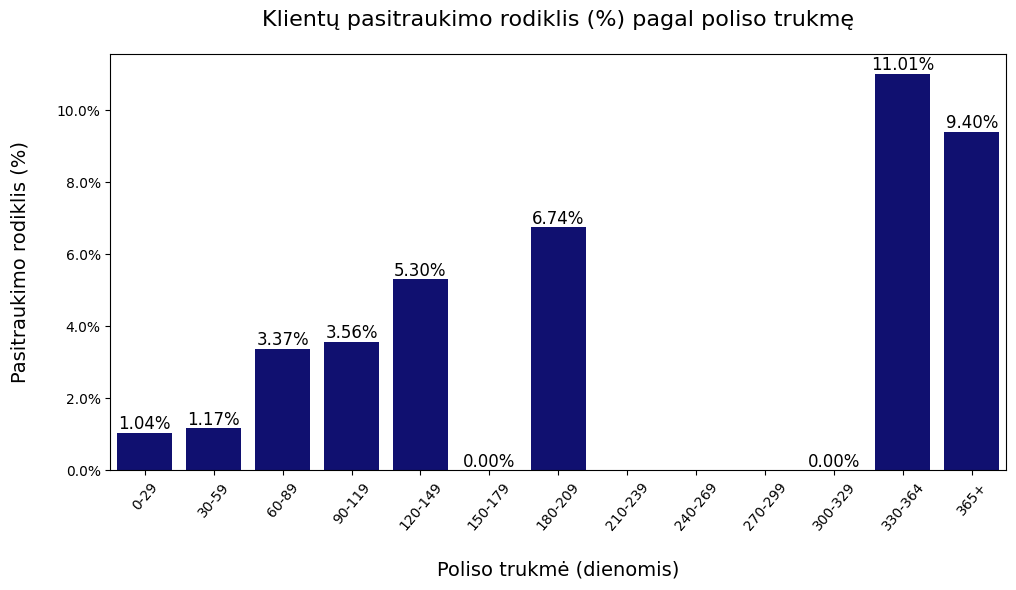

In [26]:
df = pd.DataFrame(data)

Policy_Duration_groups = [(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180), (180, 210), (210, 240), (240, 270), (270, 300), (300, 330), (330, 365)]

def categorize_driving_experience(years, Policy_Duration_groups):
    for lower, upper in Policy_Duration_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '365+'

df['Policy_Duration_groups'] = df['Policy_Duration'].apply(lambda years: categorize_driving_experience(years, Policy_Duration_groups))

duration_order = [f'{lower}-{upper - 1}' for (lower, upper) in Policy_Duration_groups] + ['365+']

df['Policy_Duration_groups'] = pd.Categorical(df['Policy_Duration_groups'], categories=duration_order, ordered=True)

churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({
    'Churn': 'sum',
    'Policy_Duration': 'count'
}).rename(columns={'Policy_Duration': 'Total_Drivers'}).reset_index()

churn_rate_by_Policy_Duration_groups['Churn Rate'] = (churn_rate_by_Policy_Duration_groups['Churn'] / churn_rate_by_Policy_Duration_groups['Total_Drivers']) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Policy_Duration_groups', y='Churn Rate', data=churn_rate_by_Policy_Duration_groups, color='navy')
plt.xticks(rotation=50)

plt.title('Klientų pasitraukimo rodiklis (%) pagal poliso trukmę', fontsize=16, pad=20)
plt.xlabel('Poliso trukmė (dienomis)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_6160\980523025.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({


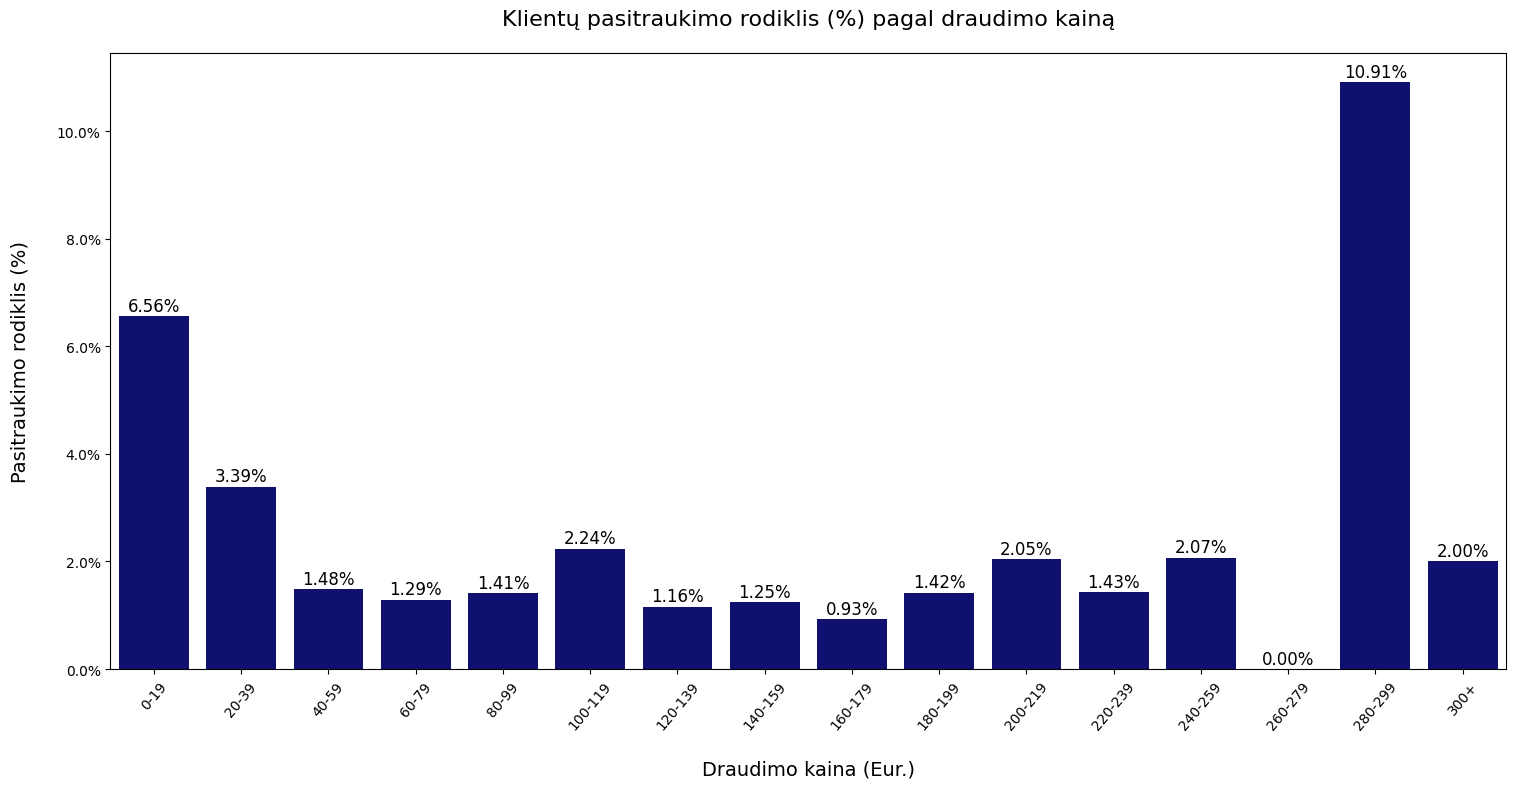

In [27]:
df = pd.DataFrame(data)

max_price = df['GWP'].max()
bins = list(range(0, 301, 20)) + [max_price]

bins[-2] = 300
bins[-1] = 300 + max_price

bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + ['300+']

df['Policy_Price_Group'] = pd.cut(df['GWP'], bins=bins, labels=bin_labels, right=False)

churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({
    'Churn': 'sum',
    'GWP': 'count'
}).rename(columns={'GWP': 'Total_Policies'}).reset_index()

churn_rate_by_policy_price_group['Churn Rate'] = (churn_rate_by_policy_price_group['Churn'] / churn_rate_by_policy_price_group['Total_Policies']) * 100 * 0.6

sorted_churn_rate_by_policy_price_group = churn_rate_by_policy_price_group.sort_values('Policy_Price_Group', ascending=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Policy_Price_Group', y='Churn Rate', data=sorted_churn_rate_by_policy_price_group, color='navy')
plt.xticks(rotation=50)
#plt.xticks([0, 1], ['Ilgalaikė sutartis', 'Trumpalaikė sutartis'])
plt.title('Klientų pasitraukimo rodiklis (%) pagal draudimo kainą', fontsize=16, pad=20)
plt.xlabel('Draudimo kaina (Eur.)', fontsize=14, labelpad=20)
plt.ylabel('Pasitraukimo rodiklis (%)', fontsize=14, labelpad=20)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [118]:
df['number_of_claims'] = df['number_of_claims'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df['Renewal'] = df['Renewal'].astype('category')

In [28]:
# Aprašomoji statistika skaitmeniniams kintamiesiems
pd.options.display.float_format = '{:.2f}'.format

numerical_description = df.describe()
print(numerical_description)


       Vehicle_age       GWP  number_of_claims     Churn  Policy_Duration  \
count    108426.00 108426.00         108426.00 108426.00        108426.00   
mean         13.29     34.73              0.08      0.06           228.77   
std           5.30     28.91              0.33      0.25           148.59   
min           0.00     -0.03              0.00      0.00            27.00   
25%          10.00     13.50              0.00      0.00            60.00   
50%          13.00     30.50              0.00      0.00           364.00   
75%          16.00     46.00              0.00      0.00           365.00   
max          69.00   1270.00              9.00      1.00           365.00   

       Client_Age  Years_of_driving  
count   108426.00         108426.00  
mean        42.91             19.12  
std         14.04             10.69  
min         18.00              0.00  
25%         33.00             12.00  
50%         41.00             19.00  
75%         52.00             25.00  
ma

In [29]:
categorical_description = df.describe(include=['object', 'bool', 'category'])
print(categorical_description)

# Arba galite gauti dažnio lentelę kiekvienam kategoriniam kintamajam atskirai
for col in df.select_dtypes(include=['object', 'bool', 'category']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

       PRODUCT   Duration    Make vehicle_type_group_mapped    Channel  \
count   108426     108426  108426                    108426     108426   
unique       2          2      40                         7          6   
top       MTPL  Ilgalaikė     BMW             6)\nAsmeninis  Brokeriai   
freq     97426      56690   14340                    101713      89439   

             Renewal  Gender     City Policy_Price_Group  
count         108426  108426   108426             108425  
unique             2       2       18                 16  
top     Neatnaujinta   Vyrai  Vilnius               0-19  
freq           62115   73234    27004              38488  
Value counts for PRODUCT:
PRODUCT
MTPL    97426
MOD     11000
Name: count, dtype: int64


Value counts for Duration:
Duration
Ilgalaikė      56690
Trumpalaikė    51736
Name: count, dtype: int64


Value counts for Make:
Make
BMW                14340
TOYOTA             10601
VW                  9902
VOLVO               7753
AUDI      

In [93]:
class_counts_resampled = pd.Series(df['Churn']).value_counts()

In [94]:
class_counts_resampled 

Churn
0    1332074
1     109708
Name: count, dtype: int64

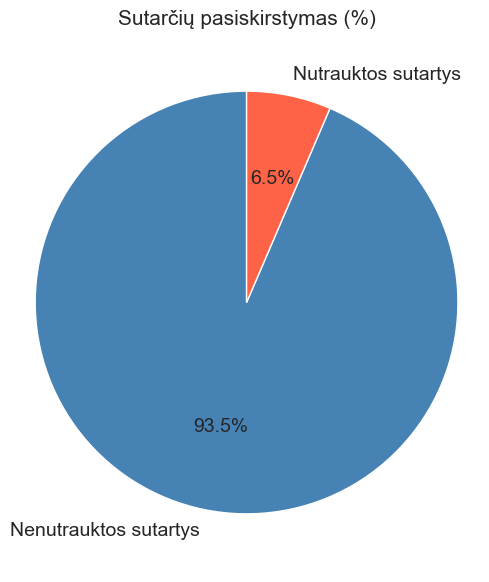

In [30]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100 
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(6, 7))
ax.pie(churn_counts, labels=['Nenutrauktos sutartys', 'Nutrauktos sutartys'], autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#FF6347'],  textprops={'fontsize': 14})
ax.set_title('Sutarčių pasiskirstymas (%)', fontsize=15)
ax.axis('equal')  

plt.show()

In [107]:
key_account_df = df[df['Channel'] == 'Key Account']

key_account_count = key_account_df.shape[0]

print("Number of 'Key account' entries:", key_account_count)

Number of 'Key account' entries: 111
